# Final Project Submission

Please fill out:
* Student name: Kevin Spring
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Cycle
1. Ask
2. Prepare (Exploratory Data Analysis - EDA)
3. Process (Clean)
4. Analyze
5. Share - Who are the stakeholders?
6. Act

# ASK: What Films Can Microsoft's new movie studio create to be successful?

- What is success? (Profit | Top Reputation/Ratings)

## Four recommendations to get from this business question
- **WHAT** movie genre in the past have had the highest profit and reputation/ratings
- **WHEN** is the best time to release these high reputation and profitable movies?
- **WHO** would be the best actors, directors, producers, for these films.
- **HOW** many films should be produced (based on budget: low, median, high budgets)



# Prepare (Exploratory Data Analysis)

- What data is available 
    - The data used in this analysis are four files provided by Flatiron for analysis.
        - IMDB (SQLite Database)
        - Box Office Mojo
            - Gross income: bom.movie_gross.csv
        - Rotten Tomatoes
            - Movie information: rt.movie_info.tsv
            - Review data: rt.reviews.tsv
        - The MovieDB
            - tmdb.movies.csv
        - The Numbers (CSV)
            - Movie Budget: tn.movie_budgets.csv

- Be in a format that is clean and accessible

- What is the movie population, the sample set, any control groups?



In [1]:
# Import libraries
import pandas as pd

# Data

The business problem is that Microsoft's new movie studio wants to know what would be the best types of movies to make. To do this I will need to know the viewer ranking, cost to make the movie, gross revenue, and release date.

## Box Office Mojo (BOM) Data

In [2]:
# Import data
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', header = 0)

# Return top of Box Office Mojo Data
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [3]:
# Return top four rows in bom_df
bom_df.head(4)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010


### Data Discussion

Box Office Mojo (BOM) has information about gross revenue with 3359 non-null domestic gross revenue and 2037 foreign non-null gross revenue.

`domestic_gross` is listed as a `float` data type but `foreign_gross` is not and likely has `str` data types within this column. I will need to find the string data in the `foreign_gross` column and convert it to a numerical data type.

## The Numbers Database

In [4]:
# import data
tndb_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', header = 0)

tndb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
tndb_df.head(4)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


### Data Discussion

TNDB contains information on movie budget, release date, and domestic and worldwide revenue. The budget is listed as a produciton budget and does not include the marketing budget. The Numbers database has 5,782 non-null values which indicates it may have placeholder values replacing missing values.

`production_budget`, `domestic_gross`, and `worldwide_gross` all are in `str` data type with dollar signs ($) and commas (,) in the string. I will be using the revenue data from BOM and not TNDB so `domestic_gross` and `worldwide_gross` can be dropped and only the `produciton_budget` data will need to be cleaned.

## IMDB data

This data is contained in a SQLite database with 7 tables. From the ERD I will be using the tables `movie_basics` and `movie_ratings` which contains the title of the movie, ratings, genre, and runtime.

<div style="max-width:600px;margin-left: auto; margin-left: 0;">
    
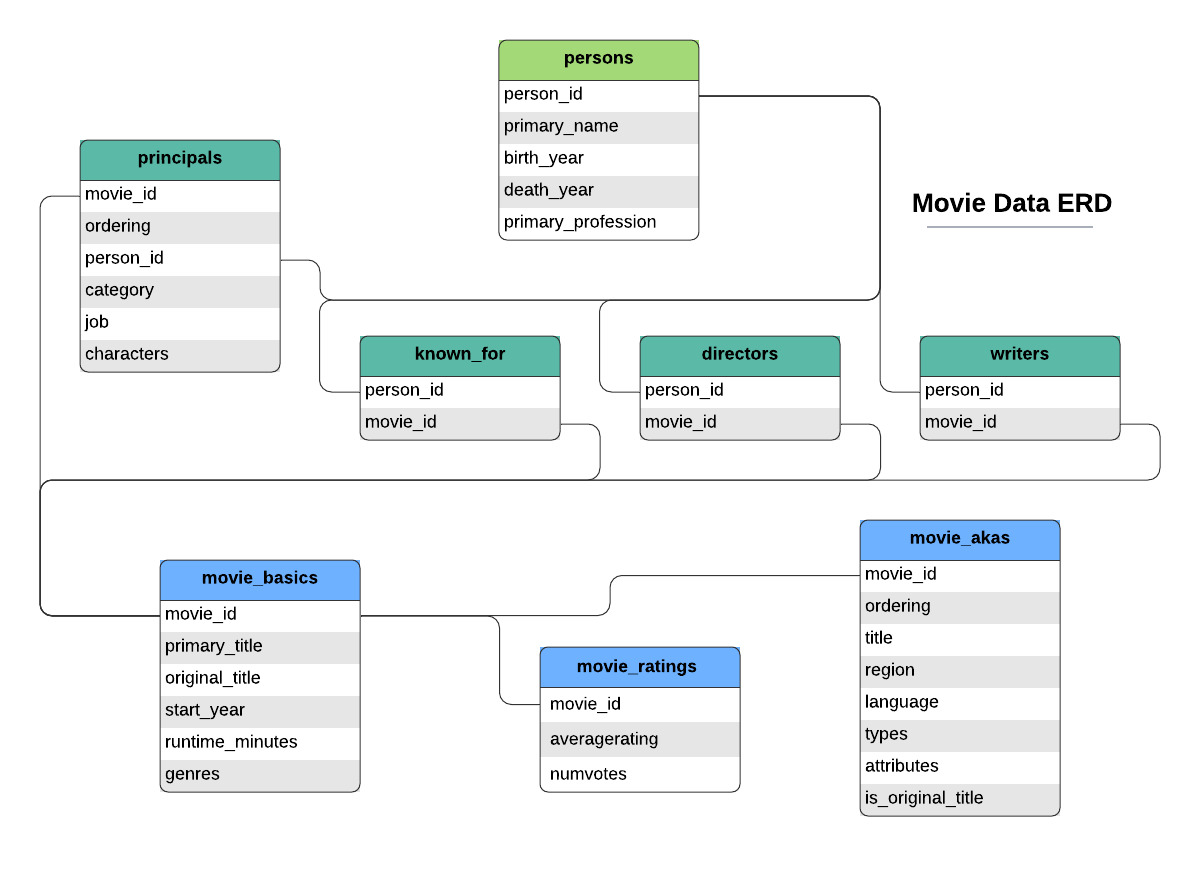
    
</div>

In [6]:
# Make connection to SQLite database
import sqlite3

# will join 2 tables movie_basics and movie_ratings

conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
q = '''
        SELECT *
        FROM movie_basics
        INNER JOIN movie_ratings
             USING(movie_id);
'''
imdb_df  = pd.read_sql_query(q, conn)
imdb_df.info()

conn.close()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [7]:
imdb_df.head(4)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13


### Data Discussion

IMDb contains the average viewer ranking in the `averagerating` column and genre in the `genres` column. There are 804 null values stored in the `genres` column so I will remove the records with these null values before joining the dataframes. This dataframe contains 73,856 records but many of them will be dropped when joining with the `tndb_df` and `bom_df` dataframes.

# Process

In this step of the process I will clean the data by discovering missing or erronous data.

## Data Cleaning Steps
1. Discover and remove duplicates
2. Find any missing values
    - NaN
    - None
3. Join dataframes
4. Check for placeholders
    A. Arbitrary dates
    B. Look for top occuring values 
        - special characters
        - special numbers
5. Have numerical data in the correct data type
6. Drop extraneous columns (extraneous or irrelevant data)


### 1. Find and Correct Duplicated Entries

(NEEDS TO BE EDITITED)

Dupilicated entries is another problem with data. There are no duplicated entries in IMDB or DOM based on the movie_id code. There are duplicated movie titles, but released in different years. When merging these two dataframes I will need to take into account the year of title of the movie and the year of its release.

In [8]:
# Look for duplicates
# IMDB
print("IMDB")
print("Duplicated records: ", imdb_df.duplicated(['primary_title', 'start_year']).sum())

# BOM
print("\nBOM")
print("Duplicated records: ", bom_df.duplicated(['title','year']).sum())

# TNDB
print("\nTNDB")
print("Duplicated records: ", tndb_df.duplicated(['movie', 'release_date']).sum())

IMDB
Duplicated records:  585

BOM
Duplicated records:  0

TNDB
Duplicated records:  0


In [9]:
imdb_df[imdb_df.duplicated(['primary_title', 'start_year'])].sort_values(['numvotes'], ascending = [False]).head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
50177,tt4972582,Split,Split,2016,117.0,"Horror,Thriller",7.3,358543
14635,tt1980929,Begin Again,Begin Again,2013,104.0,"Comedy,Drama,Music",7.4,129884
36580,tt3488710,The Walk,The Walk,2015,123.0,"Adventure,Biography,Drama",7.3,109714
44600,tt4287320,The Circle,The Circle,2017,110.0,"Drama,Sci-Fi,Thriller",5.3,72536
31646,tt3064298,Man Up,Man Up,2015,88.0,"Comedy,Drama,Romance",6.8,44338
2152,tt1336617,Cyrus,Cyrus,2010,91.0,"Comedy,Drama,Romance",6.3,32457
54898,tt5571734,Pink,Pink,2016,136.0,"Drama,Thriller",8.2,32238
46025,tt4463816,Terminal,Terminal,2018,95.0,"Crime,Drama,Thriller",5.3,14359
45221,tt4359416,Taxi,Taxi,2015,82.0,"Comedy,Drama",7.3,11870
40053,tt3802576,Brothers,Brothers,2015,156.0,"Action,Drama,Sport",6.7,10689


In [10]:
imdb_df[(imdb_df['primary_title'] == '180') & (imdb_df['start_year'] == 2010)]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [11]:
# is this in the other dataframes?
bom_df[bom_df['title'] == 'Cyrus']

,title,studio,domestic_gross,foreign_gross,year
171,Cyrus,FoxS,7500000.0,2500000,2010


In [12]:
tndb_df[tndb_df['movie'] == 'Cyrus']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4026,27,"Jun 18, 2010",Cyrus,"$7,000,000","$7,468,936","$10,062,896"


#### Results
IMDB contains 585 duplicated records based on the `primary_title` and `start_year`. I will be joining the data on these two columns. BOM and TNDB have ten times less records than IMDB so it is likely that BOM and TNDB only have data fro the most popular movie releases while IMDB contains data about obscure and foreign only movies. 

One way to remove duplicated entries is to keep the duplicate with the highest number of votes as recorded in `numvotes`.

In [13]:
imdb_df[imdb_df.duplicated(['primary_title', 'start_year'])].sort_values(['numvotes'], ascending = [False]).head(4)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
50177,tt4972582,Split,Split,2016,117.0,"Horror,Thriller",7.3,358543
14635,tt1980929,Begin Again,Begin Again,2013,104.0,"Comedy,Drama,Music",7.4,129884
36580,tt3488710,The Walk,The Walk,2015,123.0,"Adventure,Biography,Drama",7.3,109714
44600,tt4287320,The Circle,The Circle,2017,110.0,"Drama,Sci-Fi,Thriller",5.3,72536


In [14]:
imdb_df_filtered = imdb_df.sort_values(['numvotes']).drop_duplicates(['primary_title', 'start_year'], keep = 'last')
print(len(imdb_df_filtered[imdb_df_filtered.duplicated(['primary_title', 'start_year'])]))
imdb_df_filtered[imdb_df_filtered['primary_title'] == 'Cyrus']

0


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2152,tt1336617,Cyrus,Cyrus,2010,91.0,"Comedy,Drama,Romance",6.3,32457


#### IMDB Data Discussion
All duplicated entries were removed and the record with the highest `numvotes` was kept.

### 2. Join Dataframes Together

#### Change string datatype of `release_date` to datetime format

In [15]:
# Copy TNDB dataframe to clean
tndb_df_fixdate = tndb_df.copy()

# Convert string date to datetime
tndb_df_fixdate['release_date'] = pd.to_datetime(tndb_df['release_date'], format='%b %d, %Y')

# Create a new column with year called `tndb_year`
#tndb_df_fixdate['tndb_year'] = tndb_df_fixdate['release_date'].dt.to_period('Y')
tndb_df_fixdate['tndb_year'] = tndb_df_fixdate['release_date'].apply(lambda x: int(x.strftime('%Y')))
tndb_df_fixdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   tndb_year          5782 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 316.3+ KB


In [16]:
# Left Join of TNDB and BOM dataframes on movie title and year released
tndb_bom_df = tndb_df_fixdate.merge(bom_df, how = 'outer', left_on = ['movie', 'tndb_year'], right_on = ['title', 'year'])
print("Total records in joined TNDB and BOM", len(tndb_bom_df))
tndb_bom_df.head(4)

Total records in joined TNDB and BOM 7954


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tndb_year,title,studio,domestic_gross_y,foreign_gross,year
0,1.0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN
1,2.0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0
2,3.0,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,NaN,NaN,NaN,NaN,NaN
3,4.0,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0


In [17]:
# Inner join of TNDB/BOM joined dataframe and IMDB
imdb_tndb_bom_df = tndb_bom_df.merge(imdb_df_filtered, how='inner', left_on = ['movie', 'year'], right_on = ['primary_title', 'start_year'])
print("Total records in joined IMDB, TNDB, and BOM Dataframes", len(imdb_tndb_bom_df))
imdb_tndb_bom_df.head(4)

Total records in joined IMDB, TNDB, and BOM Dataframes 1025


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tndb_year,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2.0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,4.0,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,7.0,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,9.0,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,Justice League,WB,229000000.0,428900000,2017.0,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135


In [18]:
imdb_tndb_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1025 non-null   float64       
 1   release_date       1025 non-null   datetime64[ns]
 2   movie              1025 non-null   object        
 3   production_budget  1025 non-null   object        
 4   domestic_gross_x   1025 non-null   object        
 5   worldwide_gross    1025 non-null   object        
 6   tndb_year          1025 non-null   float64       
 7   title              1025 non-null   object        
 8   studio             1025 non-null   object        
 9   domestic_gross_y   1024 non-null   float64       
 10  foreign_gross      925 non-null    object        
 11  year               1025 non-null   float64       
 12  movie_id           1025 non-null   object        
 13  primary_title      1025 non-null   object        
 14  original

#### Discussion: Joined Dataframes
Out of 73,856 records in the raw IMDB dataframe, 5,782 in TNDB datframe, and 3,387 in the BOM dataframe, I am left with 1,025 records in the joined dataframe. This is a limitation of the analysis as mode data is better.

### 2. Find and Correct Missing Values

In [19]:
print("Joined Dataframe Null Values")
imdb_tndb_bom_df.isnull().sum() # add up all the True (1) values to identify null values

Joined Dataframe Null Values


id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
tndb_year              0
title                  0
studio                 0
domestic_gross_y       1
foreign_gross        100
year                   0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating          0
numvotes               0
dtype: int64

#### Repair Values Discussion

There are 100 missing values in the `foreign_gross` column and 1 in the `domestic_gross_y` column derived from the BOM dataframe. For the missing value in the `domestic_gross_y` I can used the data in `domestic_gross_x` derived from the TNDB dataframe. The missing values in `foreign_gross` can be corrected by subtracting the values in `worldwide_gross` from `domestic_gross_x`. Before this can be repaired `domestic_gross`, `worldwide_gross`, and `foreign_gross` need to be converted to a numerical data type.

##### Convert `domestic_gross_x`, `worldwide_gross`, `production_budget`, and `foreign_gross` to numerical data type
As shown in the previous table TNDB `domestic_gross_x` and `worldwide_gross` is stored as a string data type. I will strip the string, remove the '$' and commas and convert to int data type.

In [20]:
# remove '$' and ',' from production_budget, domestic_gross_x, and worldwide_gross
imdb_tndb_bom_df['production_budget'] = imdb_tndb_bom_df['production_budget'].str.replace(',', '')
imdb_tndb_bom_df['production_budget'] = imdb_tndb_bom_df['production_budget'].str.replace('$', '')
imdb_tndb_bom_df['domestic_gross_x'] = imdb_tndb_bom_df['domestic_gross_x'].str.replace(',', '')
imdb_tndb_bom_df['domestic_gross_x'] = imdb_tndb_bom_df['domestic_gross_x'].str.replace('$', '')
imdb_tndb_bom_df['worldwide_gross'] = imdb_tndb_bom_df['worldwide_gross'].str.replace(',', '')
imdb_tndb_bom_df['worldwide_gross'] = imdb_tndb_bom_df['worldwide_gross'].str.replace('$', '')

# Convert to int datatype
imdb_tndb_bom_df['production_budget'] = imdb_tndb_bom_df['production_budget'].astype('int64')
imdb_tndb_bom_df['domestic_gross_x'] = imdb_tndb_bom_df['domestic_gross_x'].astype('int64')
imdb_tndb_bom_df['worldwide_gross'] = imdb_tndb_bom_df['worldwide_gross'].astype('int64')

imdb_tndb_bom_df.head()

/tmp/ipykernel_11670/2456271369.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_tndb_bom_df['production_budget'] = imdb_tndb_bom_df['production_budget'].str.replace('$', '')
/tmp/ipykernel_11670/2456271369.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_tndb_bom_df['domestic_gross_x'] = imdb_tndb_bom_df['domestic_gross_x'].str.replace('$', '')
/tmp/ipykernel_11670/2456271369.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_tndb_bom_df['worldwide_gross'] = imdb_tndb_bom_df['worldwide_gross'].str.

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tndb_year,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2.0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011.0,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,4.0,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015.0,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,7.0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018.0,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,9.0,2017-11-17,Justice League,300000000,229024295,655945209,2017.0,Justice League,WB,229000000.0,428900000,2017.0,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
4,10.0,2015-11-06,Spectre,300000000,200074175,879620923,2015.0,Spectre,Sony,200100000.0,680600000,2015.0,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504


##### Converting datatype of `foreign_gross`
`foreign_gross` is listed as an object data type which means it must contain strings and integers in that column. As shown in the table above for *Aveengers: Infinity War*, 1,369.5 is listed as the foreign gross revenue. This value is in the billions so the comma (',') needs to be stripped out and converted to the correct value.

In [21]:
# Extract rows that have commas
imdb_tndb_bom_df[imdb_tndb_bom_df['foreign_gross'].str.contains(',', na=False)] 

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tndb_year,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,7.0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018.0,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
15,23.0,2017-04-14,The Fate of the Furious,250000000,225764765,1234846267,2017.0,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017.0,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",6.7,179774
21,34.0,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015.0,Jurassic World,Uni.,652300000.0,"1,019.4",2015.0,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
39,67.0,2015-04-03,Furious 7,190000000,353007020,1518722794,2015.0,Furious 7,Uni.,353000000.0,"1,163.0",2015.0,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074


In [22]:
# Fix `foreign_gross` data that was in billions
foreign_gross_to_replace = imdb_tndb_bom_df[imdb_tndb_bom_df['foreign_gross'].str.contains(',', na=False)]['foreign_gross'].str.replace(',', '').astype('float64') * 1000000
imdb_tndb_bom_df.loc[imdb_tndb_bom_df['foreign_gross'].str.contains(',', na=False), 'foreign_gross'] = foreign_gross_to_replace


In [23]:
# Check if was replaced correctly
imdb_tndb_bom_df[imdb_tndb_bom_df['title'] == 'Avengers: Infinity War']

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tndb_year,title,studio,domestic_gross_y,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,7.0,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018.0,Avengers: Infinity War,BV,678800000.0,1369500000.0,2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926


In [24]:
imdb_tndb_bom_df['foreign_gross'] = imdb_tndb_bom_df['foreign_gross'].astype('float64')

In [25]:
imdb_tndb_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1025 non-null   float64       
 1   release_date       1025 non-null   datetime64[ns]
 2   movie              1025 non-null   object        
 3   production_budget  1025 non-null   int64         
 4   domestic_gross_x   1025 non-null   int64         
 5   worldwide_gross    1025 non-null   int64         
 6   tndb_year          1025 non-null   float64       
 7   title              1025 non-null   object        
 8   studio             1025 non-null   object        
 9   domestic_gross_y   1024 non-null   float64       
 10  foreign_gross      925 non-null    float64       
 11  year               1025 non-null   float64       
 12  movie_id           1025 non-null   object        
 13  primary_title      1025 non-null   object        
 14  original

In [26]:
# Any records with missing values in `domestic_gross_y` and `foreign_gross`?
statement = 'Missing domestic_gross_y & foreign_gross: '
print(statement, len(imdb_tndb_bom_df[(imdb_tndb_bom_df['domestic_gross_y'].isna() ) & (imdb_tndb_bom_df['foreign_gross'].isna() )]))

# Replace missing `domestic_gross_y` data
imdb_tndb_bom_df.loc[imdb_tndb_bom_df['domestic_gross_y'].isna(), 'domestic_gross_y'] = imdb_tndb_bom_df[imdb_tndb_bom_df['domestic_gross_y'].isna()]['domestic_gross_x']

worldwide_replace = imdb_tndb_bom_df[imdb_tndb_bom_df['foreign_gross'].isna()]['worldwide_gross']
domestic_replace = imdb_tndb_bom_df[imdb_tndb_bom_df['foreign_gross'].isna()]['domestic_gross_x']
imdb_tndb_bom_df.loc[imdb_tndb_bom_df['foreign_gross'].isna(), 'foreign_gross'] = worldwide_replace - domestic_replace

Missing domestic_gross_y & foreign_gross:  0


In [27]:
print("Joined Dataframe Null Values")
imdb_tndb_bom_df.isnull().sum() # add up all the True (1) values to identify null values

Joined Dataframe Null Values


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
tndb_year            0
title                0
studio               0
domestic_gross_y     0
foreign_gross        0
year                 0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

### 3. Placeholders

#### A. Top Occuring Values
Some databases have placeholders instead of null or NaN values. I will search for top occuring values to see if placeholders or data artifacts that indicate placeholders.

In [28]:
# Look for top occuring values
print('Joined Dataframe\n')
for col in imdb_tndb_bom_df.columns:
    print(col, '\n', imdb_tndb_bom_df[col].value_counts(normalize = True).head(10), '\n')


Joined Dataframe

id 
 64.0    0.016585
60.0    0.016585
29.0    0.015610
62.0    0.014634
78.0    0.014634
34.0    0.014634
70.0    0.014634
14.0    0.014634
51.0    0.014634
36.0    0.013659
Name: id, dtype: float64 

release_date 
 2010-10-08    0.007805
2014-10-10    0.006829
2016-06-24    0.005854
2011-09-30    0.005854
2013-12-25    0.005854
2011-09-23    0.005854
2011-10-28    0.004878
2011-07-29    0.004878
2011-10-21    0.004878
2015-10-16    0.004878
Name: release_date, dtype: float64 

movie 
 Pirates of the Caribbean: On Stranger Tides    0.000976
Life of the Party                              0.000976
Sausage Party                                  0.000976
The Crazies                                    0.000976
The Switch                                     0.000976
Leap Year                                      0.000976
The Book Thief                                 0.000976
Take Me Home Tonight                           0.000976
Won't Back Down                           

#### C. Placeholder of 0 in `domestic_gross_x`
A placeholder of 0 was in `domestic_gross_x` which is derived from the TNDB data. Instead of null values, a $0 placeholder was used. I will be using `domestic_gross_y` derived from the BOM data and not `domestic_gross_y` from TNDB.

### 5. Removing Extraneous and Irrelevant Data


In [29]:
# Drop the columns not being used
analysis_df = imdb_tndb_bom_df[imdb_tndb_bom_df.columns.drop(['id', 'movie', 'studio', 'movie_id', 'primary_title', 'original_title', 'domestic_gross_x', 'worldwide_gross', 'tndb_year', 'year', 'runtime_minutes'])]
print(analysis_df.info())
analysis_df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1025 non-null   datetime64[ns]
 1   production_budget  1025 non-null   int64         
 2   title              1025 non-null   object        
 3   domestic_gross_y   1025 non-null   float64       
 4   foreign_gross      1025 non-null   float64       
 5   start_year         1025 non-null   int64         
 6   genres             1025 non-null   object        
 7   averagerating      1025 non-null   float64       
 8   numvotes           1025 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 80.1+ KB
None


,release_date,production_budget,title,domestic_gross_y,foreign_gross,start_year,genres,averagerating,numvotes
0,2011-05-20,410600000,Pirates of the Caribbean: On Stranger Tides,241100000.0,8.046000e+08,2011,"Action,Adventure,Fantasy",6.6,447624
1,2015-05-01,330600000,Avengers: Age of Ultron,459000000.0,9.464000e+08,2015,"Action,Adventure,Sci-Fi",7.3,665594
2,2018-04-27,300000000,Avengers: Infinity War,678800000.0,1.369500e+09,2018,"Action,Adventure,Sci-Fi",8.5,670926


In [30]:
# Summary statistics of TNDB dataframe
analysis_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,production_budget,domestic_gross_y,foreign_gross,start_year,averagerating,numvotes
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,52763544.05,69586337.84,105851111.34,2013.66,6.46,146317.85
std,58982785.69,89888424.34,170359756.43,2.55,0.94,178041.96
min,50000.00,0.00,0.00,2010.00,1.60,24.00
25%,13000000.00,14300000.00,8600000.00,2011.00,5.90,37939.00
50%,30000000.00,39300000.00,36400000.00,2014.00,6.50,86118.00
75%,68000000.00,84800000.00,115700000.00,2016.00,7.10,181189.00
max,410600000.00,700100000.00,1369500000.00,2018.00,8.80,1841066.00


In [34]:
# Calculate worldwide gross revenue
analysis_df['worldwide_gross'] = analysis_df['domestic_gross_y'] + analysis_df['foreign_gross']

# Calculate estimated profit
analysis_df['profit_estimate'] = analysis_df['worldwide_gross'] - analysis_df['production_budget']
analysis_df.head()

analysis_df.head()

/tmp/ipykernel_11670/2475967407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['worldwide_gross'] = analysis_df['domestic_gross_y'] + analysis_df['foreign_gross']
/tmp/ipykernel_11670/2475967407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['profit_estimate'] = analysis_df['worldwide_gross'] - analysis_df['production_budget']


,release_date,production_budget,title,domestic_gross_y,foreign_gross,start_year,genres,averagerating,numvotes,worldwide_gross,profit_estimate
0,2011-05-20 00:00:00,410600000.0,Pirates of the Caribbean: On Stranger Tides,241100000.0,8.046000e+08,2011.0,"Action,Adventure,Fantasy",6.6,447624.0,1.045700e+09,6.351000e+08
1,2015-05-01 00:00:00,330600000.0,Avengers: Age of Ultron,459000000.0,9.464000e+08,2015.0,"Action,Adventure,Sci-Fi",7.3,665594.0,1.405400e+09,1.074800e+09
2,2018-04-27 00:00:00,300000000.0,Avengers: Infinity War,678800000.0,1.369500e+09,2018.0,"Action,Adventure,Sci-Fi",8.5,670926.0,2.048300e+09,1.748300e+09
3,2017-11-17 00:00:00,300000000.0,Justice League,229000000.0,4.289000e+08,2017.0,"Action,Adventure,Fantasy",6.5,329135.0,6.579000e+08,3.579000e+08
4,2015-11-06 00:00:00,300000000.0,Spectre,200100000.0,6.806000e+08,2015.0,"Action,Adventure,Thriller",6.8,352504.0,8.807000e+08,5.807000e+08


In [ ]:
# Make Genres into a list

# Convert all records in `genres` to string
analysis_df['genres'] = analysis_df['genres'].apply(str)

# Function to take a column and split the string by commas
def split_genres(column):
    # coerce to string
    return column.split(',')

analysis_df['genres'] = analysis_df['genres'].apply(split_genres)
analysis_df.head(3)

# Data Analysis

## What is the total number of movies in this analysis?

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use('ggplot')

In [ ]:
print('Total number of movies in TNDB data:', len(tndb_df))
print('Total number of movies in BOM data:', len(bom_df))
print('Total number of movies in filtered IMDB data:', len(imdb_df_filtered))
print('Total number of movies in this analysis:', len(analysis_df))

## What is the timespan of these movies?

In [ ]:
min_release_date = analysis_df['release_date'].min().to_period('Y')
max_release_date = analysis_df['release_date'].max().to_period('Y')
print(min_release_date, ' to ', max_release_date)

## What is the mean and median ranking for all movies?

In [ ]:
print('Mean IMDb ranking:', round(analysis_df['averagerating'].mean(), 1))
print('Median IMDb ranking:', analysis_df['averagerating'].median())

## What is the distribution of movie rankings?

In [ ]:
# Make Plot
analysis_df.hist(column = 'averagerating', bins=25, color = 'c')

# Set x, y-axis labels and title
plt.ylabel('frequency', fontsize = 12)
plt.xlabel('IMDb Ranking', fontsize = 12)
plt.title('Distribution of Average IMDb Ranking', fontdict={'fontsize': 15})

# Draw a verticle line and post the median
min_ylim, max_ylim = plt.ylim()
x = imdb_tndb_bom_df['averagerating']
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1) # Makes verticle line
plt.text(x.median()*1.1, max_ylim*0.9, 'Median\n{:.1f}'.format(x.median())) # Adds text

plt.savefig('img/fig/hist_ranking.png', bbox_inches = 'tight')

## What is the distribution of worldwide movie revenue?

In [ ]:
print('Median Worldwide Gross Revenue:', round(imdb_tndb_bom_df['worldwide_gross'].median(), -5))

# Make PLot
analysis_df.hist(column = 'worldwide_gross', bins=500, color = 'c')

# Set x, y-axis labels and title
plt.ylabel('count', fontsize = 12)
plt.xlabel('\nWorldwide Revenue ($USD)', fontsize = 12)
plt.title('Distribution of Worldwide Revenue', fontdict={'fontsize': 15})

# Set x-axis limit because heavilty left-skewed
plt.xlim(xmin = 0, xmax = 500000000)

# Set x-axis to have normal ticks and not exponential
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 45)

# Draw a verticle line and post the median
min_ylim, max_ylim = plt.ylim()
x = imdb_tndb_bom_df['worldwide_gross']
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1) # Makes verticle line
plt.text(x.median()*1.1, max_ylim*0.9, 'Median \n~${:,.0f}'.format(round(x.median(), -4))) # Adds text

# Save plot
plt.savefig('img/fig/hist_worldwide_revenue.png', bbox_inches = 'tight')

## What is the distribution of movie production budget?

In [ ]:
# Return and print median
print('Median Production Budget:', round(imdb_tndb_bom_df['production_budget'].median()))

# Make plot
analysis_df.hist(column = 'production_budget', bins=100, color = 'c')

# Set x, y-axis labels and title
plt.ylabel('frequency', fontsize = 12)
plt.xlabel('\nWorldwide Revenue ($USD)', fontsize = 12)
plt.title('Distribution of Movie Production Budget', fontdict={'fontsize': 15})

# Set x-axis limit because heavilty left-skewed
plt.xlim(xmin = 0, xmax = 200000000)

# Set x-axis to have normal ticks and not exponential
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 45)

# Draw a verticle line and post the median
min_ylim, max_ylim = plt.ylim()
x = imdb_tndb_bom_df['production_budget']
plt.axvline(x.median(), color='k', linestyle='dashed', linewidth=1) # Makes verticle line
plt.text(x.median()*1.1, max_ylim*0.9, 'Median: \n${:,.0f}'.format(round(x.median()))) # Adds text

plt.savefig('img/fig/hist_production_budget.png', bbox_inches = 'tight')

## Does production budget matter for profitable and highly ranked movies?

In [ ]:
# scatterplot of Budget versus Revenue with grouped by ranking

x = analysis_df['profit_estimate']
y = analysis_df['production_budget']
colors = analysis_df['averagerating']

# Make figure
fig2 = plt.figure()
scatter_plot = plt.scatter(x, y, c = colors, alpha = 0.8, cmap = 'RdYlGn')

# Add x and y-axis labels and title
plt.ylabel('Production Budget\n (100 million $)', fontsize = 12)
plt.xlabel('\nWorldwide Profit ($USD)', fontsize = 12)
plt.title('Rank of Movie\nProfit vs Production Budget', fontdict={'fontsize': 15})

# Set x-axis to have normal ticks and not exponential
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 45)

# Makes verticle line at 0
plt.axvline(0, color='k', linestyle='dashed', linewidth=1) 

# Give colorbar a title
clb = plt.colorbar()
clb.ax.set_title('Rank')
fig2.savefig('img/fig/scatter_profit_versus_budget.png', bbox_inches = 'tight')

### Discussion
Figure 1 indicates that great movies with a ranking of 7 or higher do not need an expensive budget. It is not gauranteed that highly ranked movies generate a large amount of revenue.

In [ ]:
# Stacked Boxplot showing domestic and foregin revenue grouped by genre
# Reference: https://stackoverflow.com/questions/72272575/plotting-a-stacked-column-containing-a-categorical-list-using-pandas#72272671

# filter needed data from imdb_tndb_bom_df
boxplot_stacked_df = analysis_df.filter(['domestic_gross_y', 'foreign_gross', 'genres'])
df = boxplot_stacked_df.explode('genres').melt('genres').pivot_table(index='genres', columns='variable', values='value', aggfunc='sum')

# Make stacked bar chart

boxplot_stacked_revenue = df.plot.bar(stacked=True) # Set color https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-color/
plt.legend(['Domestic', 'Foreign'], title = 'Revenue Source')
plt.ylabel('Total Revenue\n(billion $)', fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.title('Domestic and Foreign Revenue by Genre', fontdict={'fontsize': 15})

# Set y-axis limit to match previous plot
plt.ylim(ymin = 0, ymax = 120000000000)

# Save plot to file
plt.savefig('img/fig/barplot_genre_revenue.png', bbox_inches = 'tight')

#### Discussion
Action, adventure, comedy, drama, sci-fi, thriller, and animation have the highest total worldwide revenue. A movie with one or more of these genres would be more likely to generate enough revenue to sustain this project.

In [ ]:
# Box plot showing profit by genre
# Reference: https://stackoverflow.com/questions/72272575/plotting-a-stacked-column-containing-a-categorical-list-using-pandas#72272671

# Filter necessary variables
boxplot_stacked_profit_df = analysis_df.filter(['profit_estimate', 'genres'])
df = boxplot_stacked_profit_df.explode('genres').melt('genres').pivot_table(index='genres', columns='variable', values='value', aggfunc='sum')

# Make stacked bar chart
df.plot.bar(stacked=True) # Set color https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-color/
plt.legend('', frameon = False)
plt.ylabel('Total Profit\n(billion $)', fontsize = 12)
plt.xlabel('Genre', fontsize = 12)
plt.title('Total Worldwide Profit by Movie Genre', fontdict={'fontsize': 15})

# Set y-axis limit to match previous plot
plt.ylim(ymin = 0, ymax = 120000000000)

# Save plot to file
plt.savefig('img/fig/barplot_genre_profit.png', bbox_inches = 'tight')

#### Discussion

In [ ]:
# Box plot showing box office sales with quarter of release

# Extract necessary data
# Genre, date converted to quarter, domestic_gross, foreign_gross, worldwide
boxplot_quarter = analysis_df.filter(['release_date', 'worldwide_gross'])

boxplot_quarter['release_date'] = boxplot_quarter['release_date'].dt.quarter # replace date with quarter
quarter_dict = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'} # remap dictionary
boxplot_quarter.replace({'release_date': quarter_dict}, inplace = True) # remap the quarterly values according to dictionary

# Produce the bar plt
#boxplot_quarter.groupby(['release_date']).sum().unstack(0).plot.bar(title = 'Revenue by Quarterly Release Date')
df1 = boxplot_quarter.groupby('release_date')['worldwide_gross'].sum()


boxplot_quarter_profit = analysis_df.filter(['release_date', 'profit_estimate'])

boxplot_quarter_profit['release_date'] = boxplot_quarter_profit['release_date'].dt.quarter # replace date with quarter
quarter_dict = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'} # remap dictionary
boxplot_quarter_profit.replace({'release_date': quarter_dict}, inplace = True) # remap the quarterly values according to dictionary

# Produce the bar plt
#boxplot_quarter.groupby(['release_date']).sum().unstack(0).plot.bar(title = 'Revenue by Quarterly Release Date')
df2 = boxplot_quarter_profit.groupby('release_date')['profit_estimate'].sum()


# concatenate df1 and df2
df3 = pd.concat([df1, df2], axis=1, join='inner')
df3.plot.bar()

# Set Title
plt.title('Worldwide Movie Revenue and Profit \nby Quarterly Release Date', fontdict={'fontsize': 15})

# x-axis 
plt.xlabel('Quarter of Year', fontsize = 12)
plt.xticks(rotation = 0)

# y-axis
plt.ylabel('$USD', fontsize = 12)
plt.ylim(ymin = 0, ymax = 70000000000)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.legend(['Gross Revenue', 'Profit'])
plt.savefig('img/fig/barplot_comp_quarter.png', bbox_inches = 'tight')

In [ ]:
# Ranking by quarterly release
## Reference: https://stackoverflow.com/a/40359047/1144724

# Extract necessary data
# Ranking (averagerating), datetime (release_date)
boxplot_quarter_ranking = analysis_df.filter(['release_date', 'averagerating'])

# Convert datetime to quarterly
boxplot_quarter_ranking['release_date'] = boxplot_quarter_ranking['release_date'].dt.quarter # replace date with quarter
quarter_dict = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'} # remap dictionary
boxplot_quarter_ranking.replace({'release_date': quarter_dict}, inplace = True) # remap the quarterly values according to dictionary

# Produce the boxplot
box = boxplot_quarter_ranking.boxplot(column = 'averagerating', by='release_date', notch = True, patch_artist=True)

# Set Title
plt.suptitle('')
plt.title('IMDb Movie Ranking \nby Quarterly Release Date', fontdict={'fontsize': 15})

# x-axis 
plt.xlabel('Quarter of Year', fontsize = 12)
plt.xticks(rotation = 0)

# y-axis
plt.ylabel('IMDb Ranking', fontsize = 12)
plt.ylim(ymin = 0, ymax = 10)



# Save the boxplot to file
plt.savefig('img/fig/boxplot_quarter_ranking.png', bbox_inches = 'tight')



In [ ]:
# print median of each quarter
q1_median_rank = boxplot_quarter_ranking.groupby('release_date').median()
q1_median_rank